In [29]:
import random

import numpy
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(f"Train images: {train_images.shape}")
print(f"Train labels: {train_labels.shape}")
print()
print(f"Test images: {test_images.shape}")
print(f"Test labels: {test_labels.shape}")

Train images: (60000, 28, 28)
Train labels: (60000,)

Test images: (10000, 28, 28)
Test labels: (10000,)


In CNNs, unlike the DNNs we used before, we need to account for the color channels of the input images. Our data are grayscale images, this means it has one single channel.

However CNN models require a 4D input tensor, made up of *batc_size, height, width* and *channels*.

We can fix this data mismatch by simply reshaping our data and converting the elements to *float32* values.

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32")
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype("float32")

The previous preprocessing step is standard before training an ML model, as most models require floating-point input.

Since our images are grayscale there is only one color channel, which is why we reshape the data to include a single channel dimension.

---

Now, the pixel value of our data (training and testing data) ranges fron **0** to **255**, where 0 represents black and 255 represents white. We normalize our data by dividing the pixel values by 255 to bring the pixel values in our data to a scale of between **0** and **1**. We do this to **enable our model to converge faster and perform better**:

In [9]:
# Normalize the pixel values
train_images /= 255
test_images /= 255

Now we use *to_categorical* function from *utils* module of *tf.keras* to convert our labels (train_labels, test_labels) that have an integer value of **0** to **9** into one-hot encoded arrays.

In [10]:
# Convert the labels to one-hot encoding format
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [15]:
callback = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

In [17]:
model = Sequential(
    [
        Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    train_images,
    train_labels,
    epochs=150,
    callbacks=[callback],
    validation_split=0.2,
)

c:\Users\Usuario iTC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.8127 - loss: 0.5318 - val_accuracy: 0.8911 - val_loss: 0.3013
Epoch 2/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9022 - loss: 0.2650 - val_accuracy: 0.9080 - val_loss: 0.2589
Epoch 3/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9234 - loss: 0.2098 - val_accuracy: 0.9073 - val_loss: 0.2562
Epoch 4/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9353 - loss: 0.1754 - val_accuracy: 0.9065 - val_loss: 0.2614
Epoch 5/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - accuracy: 0.9455 - loss: 0.1496 - val_accuracy: 0.9148 - val_loss: 0.2463
Epoch 6/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.9534 - loss: 0.1268 - val_accuracy: 0.9137 - val_loss: 0.2630
Epoch 7/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.9641 - loss: 0.0991 - val_accuracy: 0.9150 - val_loss: 0.2667
Epoch 8/150
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,159,520 (15.87 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,773,014 (10.58 MB)

In [19]:
# Evaluate the model
score = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9092 - loss: 0.2675


In [21]:
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.2592516839504242
Test accuracy: 0.909600019454956


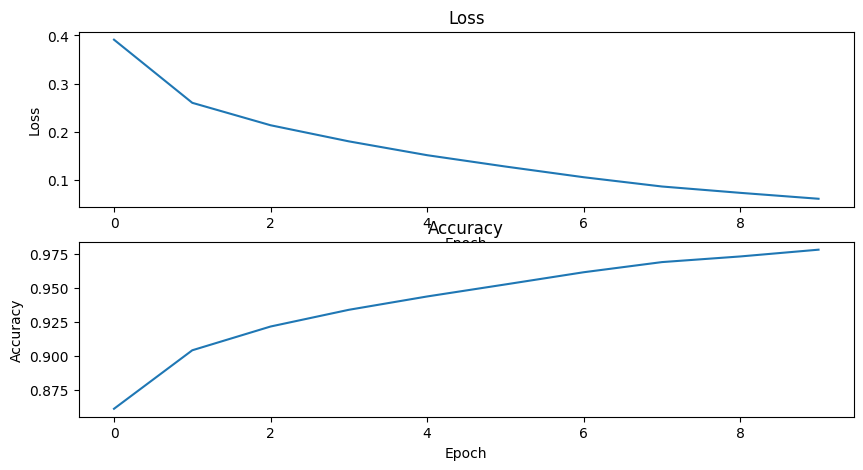

In [22]:
fig, ax = plt.subplots(2, figsize=(10, 5))
ax[0].plot(history.history["loss"])
ax[0].set_title("Loss")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")

ax[1].plot(history.history["accuracy"])
ax[1].set_title("Accuracy")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch");

# Model Prediction

In [23]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [24]:
print(predictions.shape)

(10000, 10)


In [25]:
predictions[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [26]:
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]

In [27]:
print(class_names[predictions[0].argmax()])

Ankleboot


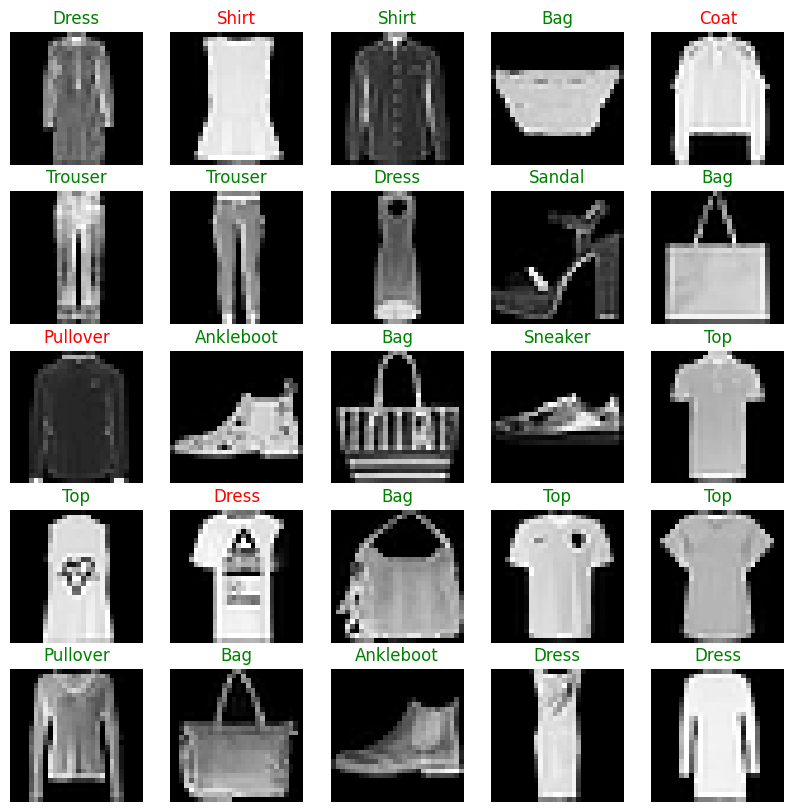

In [43]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for row in range(5):
    for col in range(5):
        idx = random.randint(0, 10000)
        axes[row][col].imshow(test_images[idx])
        axes[row][col].set_title(class_names[predictions[idx].argmax()], color="green" if predictions[idx].argmax() == test_labels[idx].argmax() else "red")    
        axes[row][col].axis("off")